<a href="https://colab.research.google.com/github/2018jangminjun/python/blob/main/Assignment_Transfer_L_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from keras.datasets import cifar10 


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:

x_train.shape
     

(50000, 32, 32, 3)

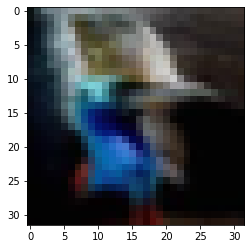

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[ 630 ]) 
plt.show()
     

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np


x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

y_train = to_categorical(y_train)   
y_test = to_categorical(y_test)


In [ ]:


from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trans_model = ResNet50(include_top=False,
                 weights="imagenet",
                 input_shape=(32,32,3),    
                 classes=1000) 



94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
trans_model.trainable = False  


from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()

model.add(trans_model) 
model.add(Flatten())

model.add(Dense(20, activation='relu')) 
model.add(Dropout(0.2))  

model.add(Dense(10,activation='softmax'))   


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 20)                40980     
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 23,628,902
Trainable params: 41,190
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=300, verbose=1) 



Epoch 1/5
167/167 [==============================] - 127s 745ms/step - loss: 2.3178 - accuracy: 0.0982
Epoch 2/5
167/167 [==============================] - 122s 731ms/step - loss: 2.3027 - accuracy: 0.0989
Epoch 3/5
167/167 [==============================] - 122s 733ms/step - loss: 2.3026 - accuracy: 0.0957
Epoch 4/5
167/167 [==============================] - 123s 739ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 5/5
167/167 [==============================] - 123s 735ms/step - loss: 2.3027 - accuracy: 0.0978
